# TWITTER SENTIMENT ANALYSIS TO STUDY CUSTOMER BEHAVIOUR

# ==> Importing necessary packages

In [1]:
import sys,tweepy,csv,re
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import string

# AMAZON INDIA

# ==> Extracting tweets and preprocessing it.

Enter Keyword/Tag to search about: AmazonIndia
Enter how many tweets to search: 3000
How people are reacting on AmazonIndia by analyzing 3000 tweets.

General Report: 

Detailed Report: 
3.27% people thought it was positive
0.20% people thought it was negative


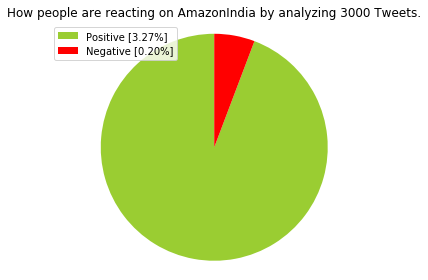

In [7]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumerKey = '######################'
        consumerSecret = '######################'
        accessToken = '######################'
        accessTokenSecret = '######################'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('Amazon.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        negative = 0



        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. 
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            
            analysis = TextBlob(tweet.text)
            
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            
            # adding reaction of how people are reacting to find average later

            if (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1

            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)


        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")


        if (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(negative) + "% people thought it was negative")


        self.plotPieChart(positive,negative,searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", (tweet)).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive,negative,searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]',
                  'Negative [' + str(negative) + '%]']
        sizes = [positive, negative]
        colors = ['yellowgreen','red']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

# ==> Making a word cloud for AMAZON

In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [154]:
df = pd.read_csv('Amazon.csv', header=None)  #sep='delimiter',

In [155]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,506,507,508,509,510,511,512,513,514,515
0,b'RT Amazon Flipkart Snapdeal and Paytm Mall h...,b'Amazon Flipkart Snapdeal and Paytm Mall have...,b'#AmazonIndia I have experianced an wrong del...,b'Hey Is it only me who is waiting for your de...,b'RT _Books Unexpected consequences and the tw...,b'Unexpected consequences and the twists and t...,b'Part 1-Dear u must devlop an option in #Amaz...,b'Online shopping for All #grocery at #AmazonI...,b'RT #HuaweiY9s with pop-up selfie camera to l...,b'#HuaweiY9s with pop-up selfie camera to laun...,...,b'#Flipkart #Walmart #AmazonIndia #DMart see t...,b'RT _scrbblr The world\xe2\x80\x99s richest m...,b'Lifebuoy Nature Germ Protection Handwash Ref...,b'Wipro Prism Rechargeable LED Torch Cum Lante...,b'Dilli6 Ke Combo Ghar Jaisa Khana.. Meal for ...,b'Wall Decor #madeinindia #Craftbywomen #suppo...,b'#QuizTimeMornigsWithAmazon #AmazonIndia #Ama...,b'thanks for this quiz #AmazonIndia #QuizTimeM...,b'RT for better sound quality we r trusting a ...,b'for better sound quality we r trusting a d c...


In [156]:
df = df.T

In [157]:
df.head()

,0
0,b'RT Amazon Flipkart Snapdeal and Paytm Mall h...
1,b'Amazon Flipkart Snapdeal and Paytm Mall have...
2,b'#AmazonIndia I have experianced an wrong del...
3,b'Hey Is it only me who is waiting for your de...
4,b'RT _Books Unexpected consequences and the tw...


In [158]:
#Treating Unicode character
import ast  #AST ..... Abstract Syntax Tree
            #ast. literal_eval: Safely evaluate an expression node or a string 
            #containing a Python literal or container display. 
df[0]= df[0].apply(ast.literal_eval).str.decode("utf-8")
df[0].replace(u"\ufffd", "?")

0      RT Amazon Flipkart Snapdeal and Paytm Mall hav...
1      Amazon Flipkart Snapdeal and Paytm Mall have s...
2      #AmazonIndia I have experianced an wrong deliv...
3      Hey Is it only me who is waiting for your deli...
4      RT _Books Unexpected consequences and the twis...
                             ...                        
511    Wall Decor #madeinindia #Craftbywomen #support...
512    #QuizTimeMornigsWithAmazon #AmazonIndia #Amazo...
513    thanks for this quiz #AmazonIndia #QuizTimeMor...
514    RT for better sound quality we r trusting a d ...
515    for better sound quality we r trusting a d cho...
Name: 0, Length: 516, dtype: object

In [159]:
#Cleaning the data (Removing Links, Re-Tweet, and other character)
words = df[0].tolist()
words = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +) | (b'RT)", "", str(words))
words = re.sub("(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", " ", words)
words = re.sub(r':', '',words)
words = re.sub(r'‚Ä¶', '', words)
words = re.sub(r'[^\x00-\x7F]+',' ', words)
words = re.sub(r'[\xe2\x98\x85]+',"", words)

In [ ]:
words

In [161]:

words_as_one_string ="".join(words)


In [ ]:
words_as_one_string

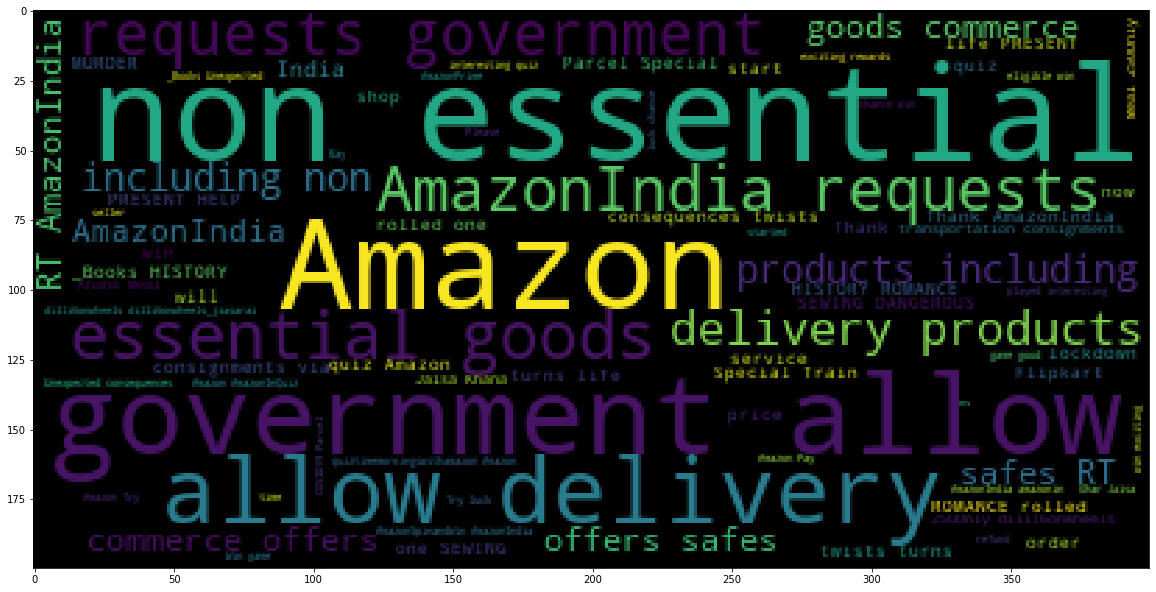

In [163]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string))

# FLIPKART

# ==> Extracting tweets and preprocessing it.

In [ ]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumerKey = '######################'
        consumerSecret = '######################'
        accessToken = '######################'
        accessTokenSecret = '######################'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('Flipkart.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        negative = 0



        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later.
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            
            analysis = TextBlob(tweet.text)
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            
            # adding reaction of how people are reacting to find average later

            if (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1

            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)


        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")


        if (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(negative) + "% people thought it was negative")


        self.plotPieChart(positive,negative,searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive,negative,searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]',
                  'Negative [' + str(negative) + '%]']
        sizes = [positive, negative]
        colors = ['yellowgreen','red']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

# ==> Making a word cloud for FLIPKART


In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
df = pd.read_csv('Flipkart.csv', header =None)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,888,889,890,891,892,893,894,895,896,897
0,b'RT We are now delivering all products in or...,b'RT Medlife partners with Snapdeal to offer m...,b'_surani We always request to everyone never ...,"b""_surani Hi I apologize for the disappointing...",b'_Help Snapdeal sellers are not liable to ful...,b'RT Epharmacy platform partners with to enabl...,b'RT Epharmacy platform partners with to enabl...,b'RT Epharmacy platform partners with to enabl...,"b""RT Day 1 of relaxed lockdown Amazon Snapdeal...","b""RT Day 1 of relaxed lockdown Amazon Snapdeal...",...,"b""Hi I apologize for the disappointing experie...",b'#navycapital .snapdeal founders back water p...,b'We make your food cravings fulfill Cook deli...,b'Hi Please do not respond to any Phone Call/E...,b'RT Shopping online with best online shopping...,b'Our team got in touch with you and updated y...,b'_Help How is it that I get an email askin me...,b'_mahajan Sir we can not ignore chinese manuf...,b'RT NEW India reintroduces a ban on delivery ...,b'Could you please help me to permanently clos...


In [11]:
df = df.T

In [12]:
df.head()

,0
0,b'RT We are now delivering all products in or...
1,b'RT Medlife partners with Snapdeal to offer m...
2,b'_surani We always request to everyone never ...
3,"b""_surani Hi I apologize for the disappointing..."
4,b'_Help Snapdeal sellers are not liable to ful...


In [13]:
#Treating Unicode character
import ast
df[0]= df[0].apply(ast.literal_eval).str.decode("utf-8")
df[0].replace(u"\ufffd", "?")

0      RT  We are now delivering all products in oran...
1      RT Medlife partners with Snapdeal to offer med...
2      _surani We always request to everyone never sh...
3      _surani Hi I apologize for the disappointing e...
4      _Help Snapdeal sellers are not liable to fulfi...
                             ...                        
893    Our team got in touch with you and updated you...
894    _Help How is it that I get an email askin me t...
895    _mahajan Sir we can not ignore chinese manufac...
896    RT NEW India reintroduces a ban on delivery of...
897    Could you please help me to permanently close ...
Name: 0, Length: 898, dtype: object

In [14]:
#Cleaning the data (Removing Links, Re-Tweet, and other character)
words = df[0].tolist()
words = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +) | (b'RT)", "", str(words))
words = re.sub("(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", " ", words)
words = re.sub(r':', '',words)
words = re.sub(r'‚Ä¶', '', words)
words = re.sub(r'[^\x00-\x7F]+',' ', words)
words = re.sub(r'[\xe2\x98\x85]+',"", words)

In [ ]:
words

In [16]:
words_as_one_string ="".join(words)

In [ ]:
words_as_one_string

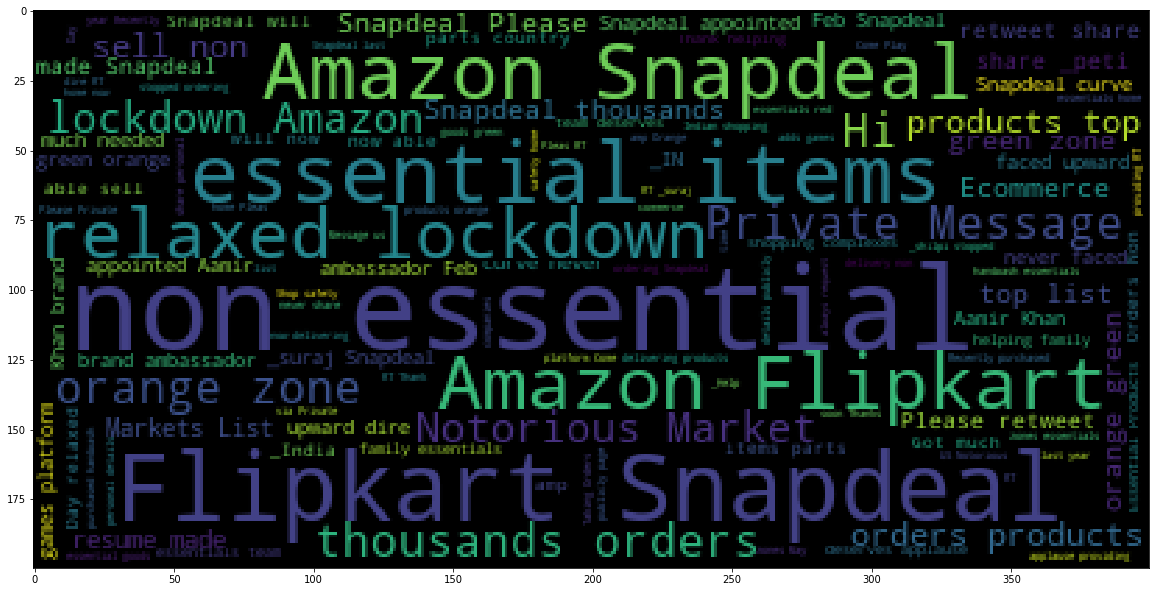

In [19]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string))

# SNAPDEAL

# ==> Extracting tweets and preprocessing it.

Enter Keyword/Tag to search about: Snapdeal
Enter how many tweets to search: 3000
How people are reacting on Snapdeal by analyzing 3000 tweets.

General Report: 

Detailed Report: 
3.73% people thought it was positive
0.60% people thought it was negative


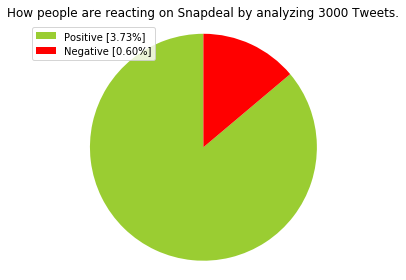

In [20]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumerKey = '######################'
        consumerSecret = '######################'
        accessToken = '######################'
        accessTokenSecret = '######################'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('Snapdeal.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        negative = 0



        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. 
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            
            analysis = TextBlob(tweet.text)
           
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            
            # adding reaction of how people are reacting to find average later

            if (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1

            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)


        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")


        if (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(negative) + "% people thought it was negative")


        self.plotPieChart(positive,negative,searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive,negative,searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]',
                  'Negative [' + str(negative) + '%]']
        sizes = [positive, negative]
        colors = ['yellowgreen','red']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

# ==> Making a word cloud for SNAPDEAL

In [10]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

In [13]:
df = pd.read_csv('Snapdeal.csv', header =None)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,888,889,890,891,892,893,894,895,896,897
0,b'RT Shop from the safety of your home \xf0\x9...,b'RT Medlife partners with Snapdeal to offer m...,b'_surani We always request to everyone never ...,"b""_surani Hi I apologize for the disappointing...",b'_Help Snapdeal sellers are not liable to ful...,b'RT Epharmacy platform partners with to enabl...,b'RT Epharmacy platform partners with to enabl...,b'RT Epharmacy platform partners with to enabl...,"b""RT Day 1 of relaxed lockdown Amazon Snapdeal...","b""RT Day 1 of relaxed lockdown Amazon Snapdeal...",...,"b""Hi I apologize for the disappointing experie...",b'#navycapital .snapdeal founders back water p...,b'We make your food cravings fulfill Cook deli...,b'Hi Please do not respond to any Phone Call/E...,b'RT Shopping online with best online shopping...,b'Our team got in touch with you and updated y...,b'_Help How is it that I get an email askin me...,b'_mahajan Sir we can not ignore chinese manuf...,b'RT NEW India reintroduces a ban on delivery ...,b'Could you please help me to permanently clos...


In [15]:
df = df.T

In [16]:
df.head()

,0
0,b'RT Shop from the safety of your home \xf0\x9...
1,b'RT Medlife partners with Snapdeal to offer m...
2,b'_surani We always request to everyone never ...
3,"b""_surani Hi I apologize for the disappointing..."
4,b'_Help Snapdeal sellers are not liable to ful...


In [17]:
import ast
df[0]= df[0].apply(ast.literal_eval).str.decode("utf-8")
df[0].replace(u"\ufffd", "?")

0      RT Shop from the safety of your home 🏠 We are ...
1      RT Medlife partners with Snapdeal to offer med...
2      _surani We always request to everyone never sh...
3      _surani Hi I apologize for the disappointing e...
4      _Help Snapdeal sellers are not liable to fulfi...
                             ...                        
893    Our team got in touch with you and updated you...
894    _Help How is it that I get an email askin me t...
895    _mahajan Sir we can not ignore chinese manufac...
896    RT NEW India reintroduces a ban on delivery of...
897    Could you please help me to permanently close ...
Name: 0, Length: 898, dtype: object

In [18]:
#Cleaning the data (Removing Links, Re-Tweet, and other character)
words = df[0].tolist()
words = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +) | (b'RT)", "", str(words))
words = re.sub("(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", " ", words)
words = re.sub(r':', '',words)
words = re.sub(r'‚Ä¶', '', words)
words = re.sub(r'[^\x00-\x7F]+',' ', words)
words = re.sub(r'[\xe2\x98\x85]+',"", words)

In [ ]:
words

In [20]:
words_as_one_string ="".join(words)

In [ ]:
words_as_one_string

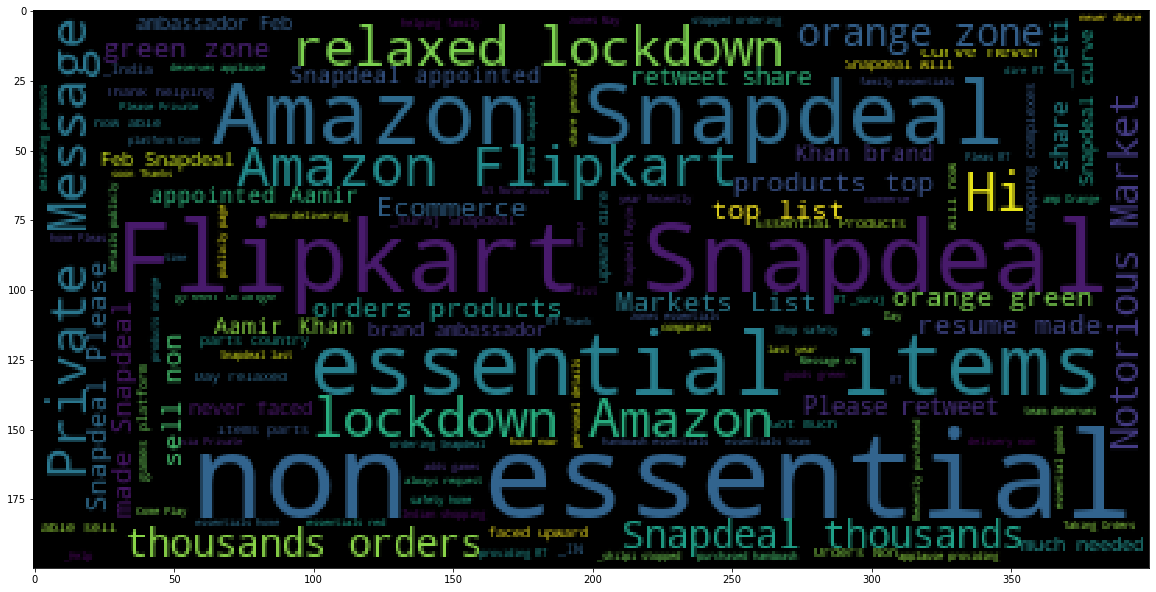

In [22]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words_as_one_string))